===== Last 30 days 


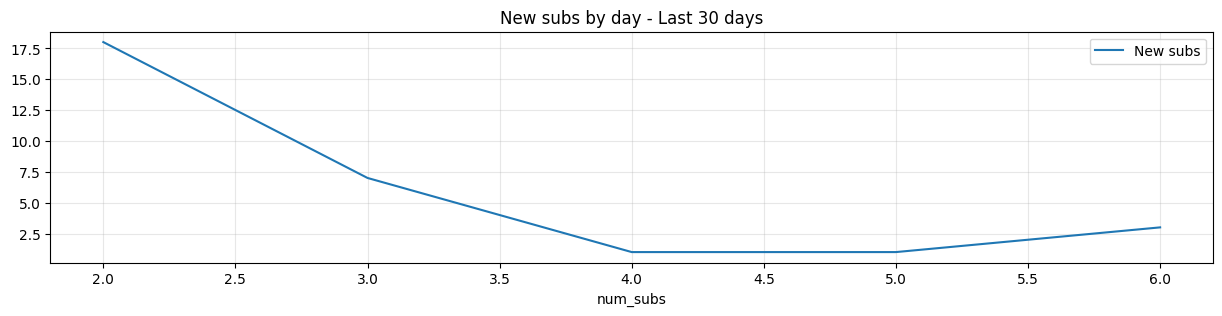

===== Last 90 days 


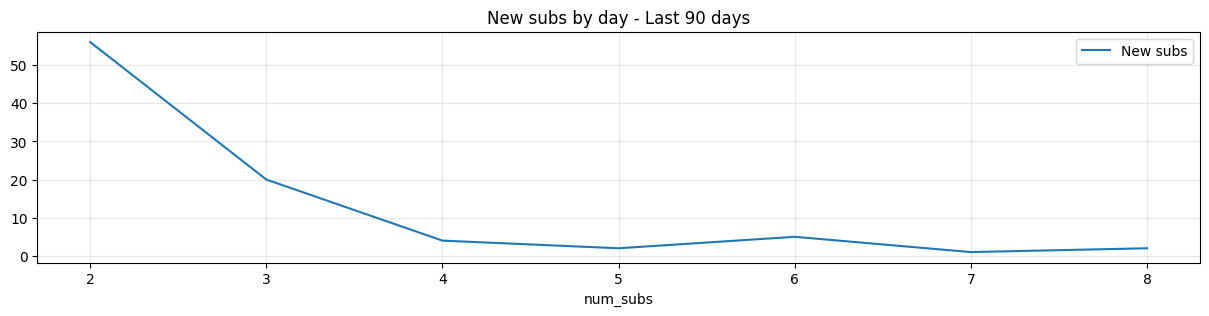

===== age_cut


,count,mean
age_cut,,
"(18, 25]",201,0.298507
"(25, 30]",376,0.281915
"(30, 35]",444,0.227477
"(35, 40]",450,0.231111
"(40, 45]",393,0.221374
"(45, 99]",769,0.169051


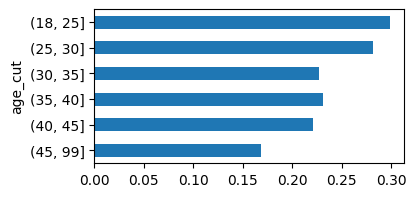

===== salary_cut


,count,mean
salary_cut,,
"(1000, 1500]",56,0.375000
"(1500, 2000]",232,0.262931
"(2000, 3000]",989,0.229525
"(3000, 4000]",661,0.223903
"(4000, 6000]",636,0.196541
"(6000, 99999]",204,0.176471


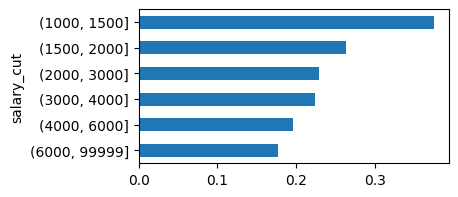

===== workplace_time_cut


,count,mean
workplace_time_cut,,
"(0, 50]",1165,0.236910
"(50, 100]",660,0.236364
"(100, 200]",555,0.225225
"(200, 500]",382,0.159686


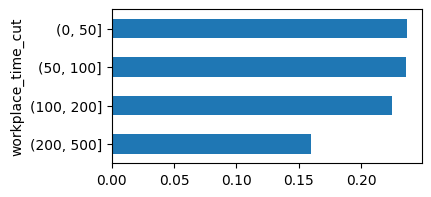

In [4]:
# Paquetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

import pickle
import warnings
warnings.filterwarnings('ignore')
#import boto3
import joblib
#import sagemaker
from io import StringIO,BytesIO
import json
#import awswrangler as wr
import mis_funciones as mf

#pip install joblib

# Obtenemos la data

df = pd.read_csv("df_prepared.csv")



# Grouth analysis

## New subscriptions by week and month

### Preprocessing


### Plot New/recurrent subs clients by day,week,month


for i in [30,90]:
    now = datetime.now()
    now = now - timedelta(days=i)
    
    print(f"===== Last {i} days ")
    df_gr = df.tail(i).groupby("num_subs").subscription_id.count().sort_index()
    df_gr.plot(figsize=(15,3))
    plt.grid(True,alpha=0.3)
    title = f'New subs by day - Last {i} days'
    plt.title(title)
    plt.legend([f"New subs"])
    plt.show()

df['age_cut'] = pd.cut(df['age_subcriptionmean'],[18,25,30,35,40,45,99])
df['salary_cut'] = pd.cut(df['salary'],[1000,1500,2000,3000,4000,6000,99999])
df['workplace_time_cut'] = pd.cut(df['workplace_time'],[0,50,100,200,500])

[c for c in df.columns if "aging_30plus" in c]



# Profiling
cols = ["age_cut","salary_cut","workplace_time_cut"]
for c in cols:
    print("===== "+c)
    feat = c
    df_feat = df.groupby(f"{feat}").aging_30plus_subcriptionmean.agg(['count','mean']).sort_index()
    df_feat['mean'].sort_index(ascending=False).plot(kind='barh',figsize=(4,2))
    display(df.groupby(feat).aging_30plus_subcriptionmean.agg(['count','mean']).sort_index())
    plt.show()